In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix

# from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

1. Import dataset

In [2]:
##dataset loading...
print("[INFO] loading data...")
dataset = load_iris()

#https://archive.ics.uci.edu/ml/datasets/iris

dataset.data.shape

[INFO] loading data...


(150, 4)

## Decision Tree
A decision tree is a __supervised learning algorithm__ used for both classification and regression tasks. It has a hierarchical tree structure composed of a root node, branches, internal nodes, and leaf nodes.

<img src="img/decision_tree.png" alt="Decision tree" width="600">

A decision tree starts with the __root node__, which has no incoming branches. The outgoing branches from the root lead to __internal nodes__, also known as __decision nodes__.

Both root and internal nodes perform evaluations to split the data into homogeneous subsets, which are represented by __leaf nodes__ or __terminal nodes__.

__Leaf nodes__ represent all possible outcomes (either continuous or discrete) within the dataset.


2. Define the classifier

In [3]:
##instantiate the DT model
dt = DecisionTreeClassifier(random_state=1)

3. Split dataset

In [4]:
#outter hold out for model testing
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, random_state=1, test_size=0.20)

4. Grid search

In [7]:
#DT hyperparameters
p_grid = {"max_depth": [2, 3, 4, 5, 10, 15, 20, 25, 30]}
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples,
# i.e., the minimum number of samples required to split an internal node.


# inner CV for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

#Inner Grid-search ...finding the optimal hyperparameters
clf = GridSearchCV(estimator=dt, param_grid=p_grid, cv=inner_cv, verbose=0)

5. Model training

In [8]:
#find the best hyperparameters and training the model
clf.fit(trainX, trainY)

print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=3, random_state=1)


6. Model testing

In [9]:
#testing the model
predictions = clf.predict(testX)

In [11]:
predictions

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

7. Performance evaluation

In [12]:
acc=accuracy_score(testY, predictions)
print("ACCURACY DT model: {}".format(acc))

ACCURACY DT model: 0.9666666666666667


In [14]:
# #classification report
# print(classification_report(testY, predictions, target_names=dataset.target_names))
print(classification_report(testY, predictions, target_names=dataset.target_names, digits=4))

              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        11
  versicolor     1.0000    0.9231    0.9600        13
   virginica     0.8571    1.0000    0.9231         6

    accuracy                         0.9667        30
   macro avg     0.9524    0.9744    0.9610        30
weighted avg     0.9714    0.9667    0.9673        30



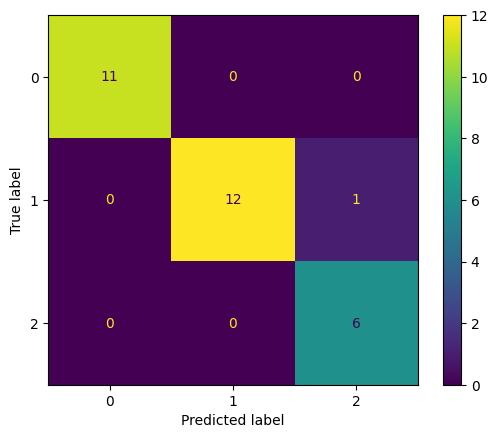

In [15]:
# #confusion matrix
cm = confusion_matrix(testY, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()


8. Model interpretability

[0.        0.        0.0789118 0.9210882]


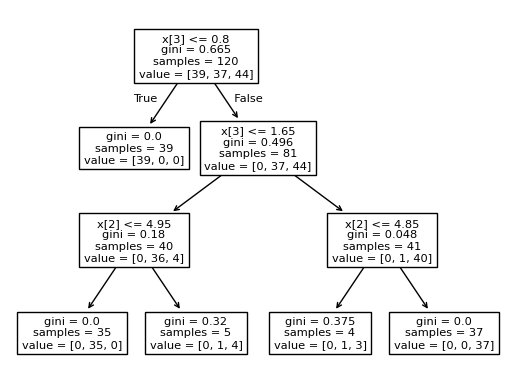

In [16]:
dtopt=DecisionTreeClassifier(random_state=1,max_depth=clf.best_estimator_.max_depth)
clf2 = dtopt.fit(trainX, trainY)
tree.plot_tree(clf2)
print(clf2.feature_importances_)

### What is _gini_?
Gini stands for __gini impurity__. It is a measure of how pure or impure a node is — that is, how mixed the classes are at that point in the tree.

For a node with $N$ classes, gini is defined as $gini = 1 - \sum_{i=1}^N p_i^2 \ $, where $p_i$ is the proportion of samples belonging to class $i$ in that node.

* If all samples in a node are of the same class, the Gini impurity is 0 (perfectly pure).
* If the samples are evenly split among classes, impurity is higher.


In [17]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

#per approfondire samples and value

In [20]:
n_nodes = clf2.tree_.node_count
print("number of nodes", n_nodes)

number of nodes 9


In [21]:
nodes_depth = clf2.tree_.compute_node_depths()
print("nodes depth", nodes_depth)

nodes depth [1 2 2 3 4 4 3 4 4]


In [22]:
clf2.tree_.value

array([[[0.325     , 0.30833333, 0.36666667]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 0.45679012, 0.54320988]],

       [[0.        , 0.9       , 0.1       ]],

       [[0.        , 1.        , 0.        ]],

       [[0.        , 0.2       , 0.8       ]],

       [[0.        , 0.02439024, 0.97560976]],

       [[0.        , 0.25      , 0.75      ]],

       [[0.        , 0.        , 1.        ]]])